In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio   
import plotly.colors as colors 
pio.templates.default = "plotly_white" 

In [5]:
data = pd.read_csv("Sample - Superstore (1).csv", encoding='latin-1') 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Descriptive Statistics 

In [7]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column
to create new columns like order month, order year, and order day,
which will be very valuable for sales and profit analysis 
according to time periods. So let’s add these columns:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Converting Date Columns

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
#Date Conversion for date-based analysis.


## Adding New Date-Based Columns for Monthly, Yearly and Weekly Analysis

In [10]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek


In [13]:
data.head()
#verify the modification of new date columns 
#column number increased from 21 --> to 24

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# 1. Monthly Sales Analysis 

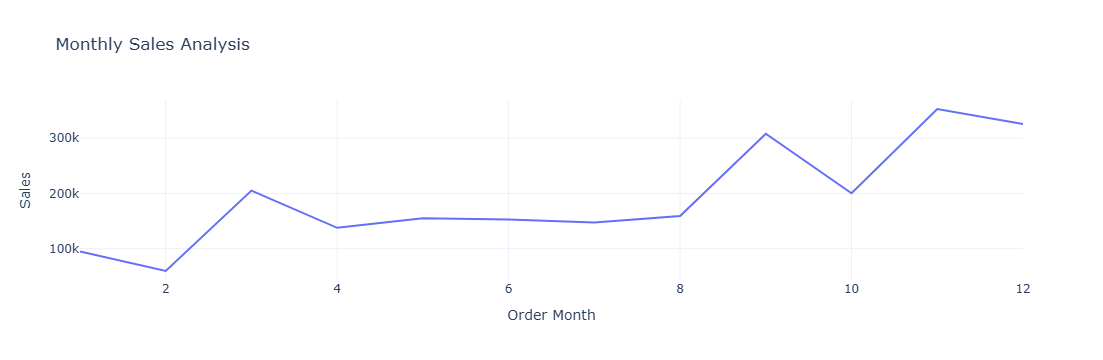

Highest Sales Month: 11.0 with 352461.07
Lowest Sales Month: 2.0 with 59751.25


In [16]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, 
              x='Order Month', 
              y='Sales', 
              title='Monthly Sales Analysis')
fig.show()

max_sales = sales_by_month.loc[sales_by_month['Sales'].idxmax()]
min_sales = sales_by_month.loc[sales_by_month['Sales'].idxmin()]

print(f"Highest Sales Month: {max_sales['Order Month']} with {max_sales['Sales']:.2f}")
print(f"Lowest Sales Month: {min_sales['Order Month']} with {min_sales['Sales']:.2f}")


# 2. Sales Analysis by Category

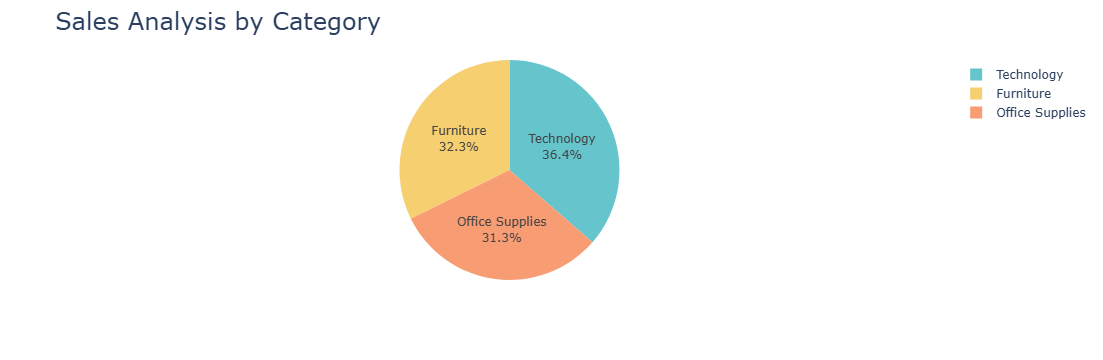

In [19]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()


fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

# 3. Sales Analysis by Sub-category

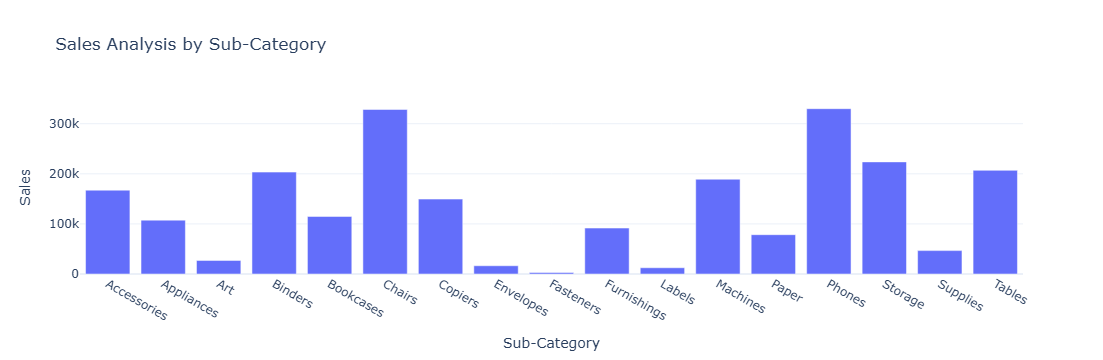

Highest Sales Sub-Category: Phones with 330007.05
Lowest Sales Sub-Category: Fasteners with 3024.28


In [22]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

max_subcat = sales_by_subcategory.loc[sales_by_subcategory['Sales'].idxmax()]
min_subcat = sales_by_subcategory.loc[sales_by_subcategory['Sales'].idxmin()]

print(f"Highest Sales Sub-Category: {max_subcat['Sub-Category']} with {max_subcat['Sales']:.2f}")
print(f"Lowest Sales Sub-Category: {min_subcat['Sub-Category']} with {min_subcat['Sales']:.2f}")


# 4. Monthly Profit Analysis

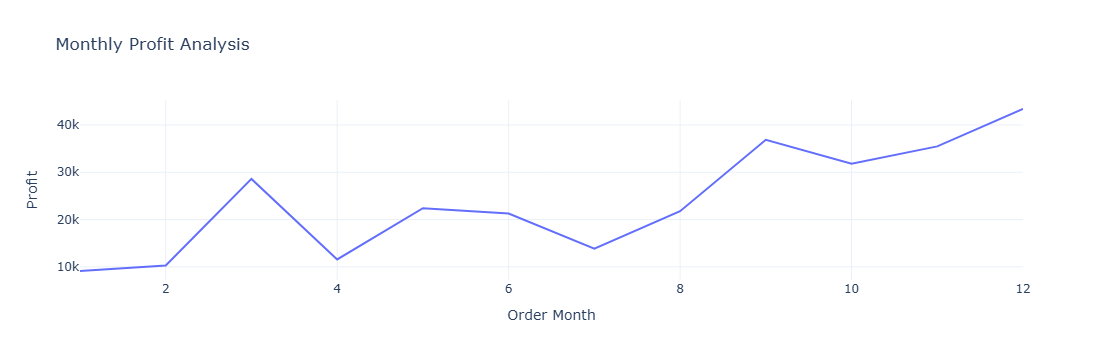

Highest Profit Month: 12.0 with 43369.19
Lowest Profit Month: 1.0 with 9134.45


In [26]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Order Month', 
              y='Profit', 
              title='Monthly Profit Analysis')
fig.show()

max_profit = profit_by_month.loc[profit_by_month['Profit'].idxmax()]
min_profit = profit_by_month.loc[profit_by_month['Profit'].idxmin()]

print(f"Highest Profit Month: {max_profit['Order Month']} with {max_profit['Profit']:.2f}")
print(f"Lowest Profit Month: {min_profit['Order Month']} with {min_profit['Profit']:.2f}")


# 5.1 Analyze the Profit by Category

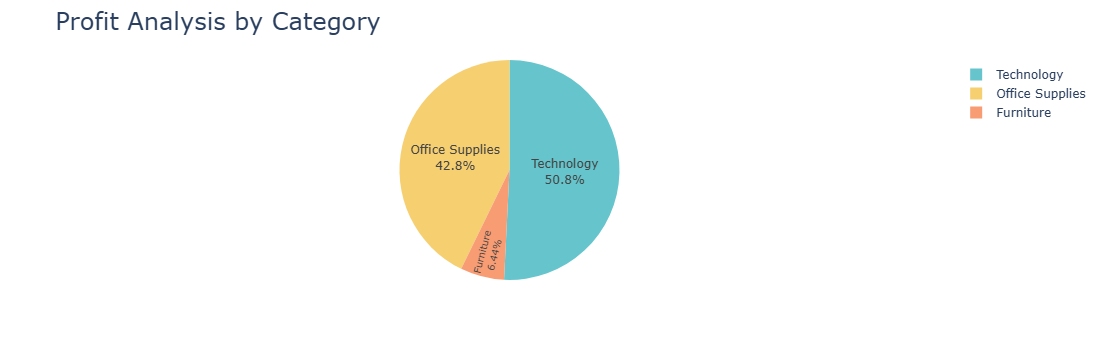

In [28]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()

# 5.2 Analyze Profit by Sub-Category

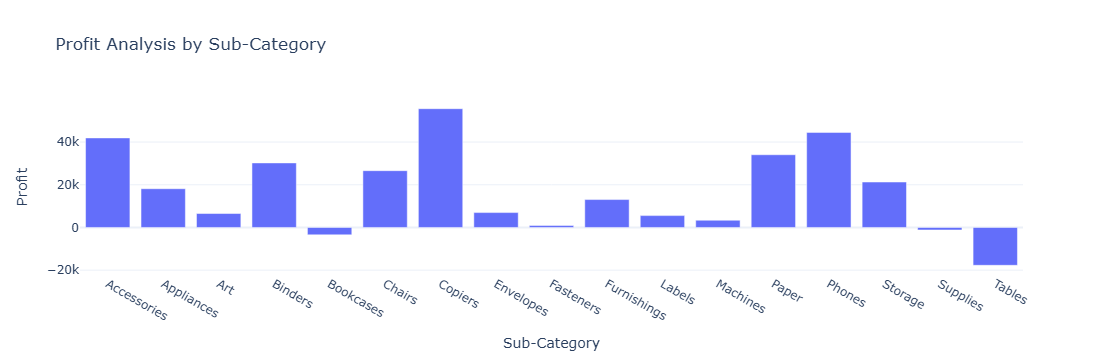

Highest Profit Sub-Category: Copiers with 55617.82
Lowest Profit Sub-Category: Tables with -17725.48


In [31]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

max_profit_subcat = profit_by_subcategory.loc[profit_by_subcategory['Profit'].idxmax()]
min_profit_subcat = profit_by_subcategory.loc[profit_by_subcategory['Profit'].idxmin()]

print(f"Highest Profit Sub-Category: {max_profit_subcat['Sub-Category']} with {max_profit_subcat['Profit']:.2f}")
print(f"Lowest Profit Sub-Category: {min_profit_subcat['Sub-Category']} with {min_profit_subcat['Profit']:.2f}")


# 6. Sales and Profit Analysis by Customer Segment

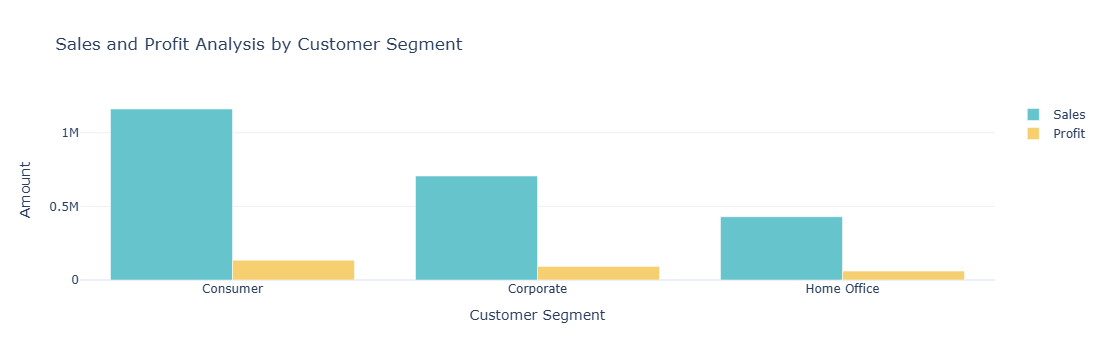

In [34]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()



# 7. Analyze sales-to-profit ratio

In [35]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
